In [1]:
import SimpleITK as sitk
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import shutil

In [25]:
fixed="110113_FB48DH_FS"
moving="120315_NM86UB_FS"

fixed_array = sitk.GetArrayFromImage(sitk.ReadImage(fixed))
moving_array= sitk.GetArrayFromImage(sitk.ReadImage(moving))

pts = np.load(fixed+"-"+moving+"_KNN_RES.npy")

(8, 11, 3)


In [22]:
def plot_one_pixel_on_all_moving_images(fixed_array, moving_array, fixed_pixel, moving_pixel):
    '''each moving_pixel in moving_pixels corresponds to each array in moving_arrays'''
    fig,axs=plt.subplots(2,3,figsize=(10,7))
    fig.suptitle('correspondence for' + str(fixed_pixel))
    
    '''plot fixed'''
    x,y,z=fixed_pixel
    # along x axis
    axs[0,0].imshow(fixed_array[x,:,:],origin="lower")
    rect=patches.Rectangle((z-15,y-15),30,30,facecolor='none',edgecolor='r')
    axs[0,0].plot(z,y,'o')
    axs[0,0].add_patch(rect)
    axs[0,0].set_title('fixed '+str(fixed_pixel))
    
    # along y axis
    axs[0,1].imshow(fixed_array[:,y,:],origin="lower")
    rect=patches.Rectangle((z-15,x-15),30,30,facecolor='none',edgecolor='r')
    axs[0,1].plot(z,x,'o')
    axs[0,1].add_patch(rect)
    
    # along z axis
    axs[0,2].imshow(fixed_array[:,:,z],origin="lower")
    rect=patches.Rectangle((y-15,x-15),30,30,facecolor='none',edgecolor='r')
    axs[0,2].plot(y,x,'o')
    axs[0,2].add_patch(rect)
    
    x,y,z=moving_pixel

    # along x axis
    axs[1,0].imshow(moving_array[x,:,:],origin="lower")
    rect=patches.Rectangle((z-15,y-15),30,30,facecolor='none',edgecolor='r')
    axs[1,0].plot(z,y,'o')
    axs[1,0].add_patch(rect)
    axs[1,0].set_title("Moving "+str(moving_pixel))

    # along y axis
    axs[1,1].imshow(moving_array[:,y,:],origin="lower")
    rect=patches.Rectangle((z-15,x-15),30,30,facecolor='none',edgecolor='r')
    axs[1,1].plot(z,x,'o')
    axs[1,1].add_patch(rect)

    # along z axis
    axs[1,2].imshow(moving_array[:,:,z],origin="lower")
    rect=patches.Rectangle((y-15,x-15),30,30,facecolor='none',edgecolor='r')
    axs[1,2].plot(y,x,'o')
    axs[1,2].add_patch(rect)
    

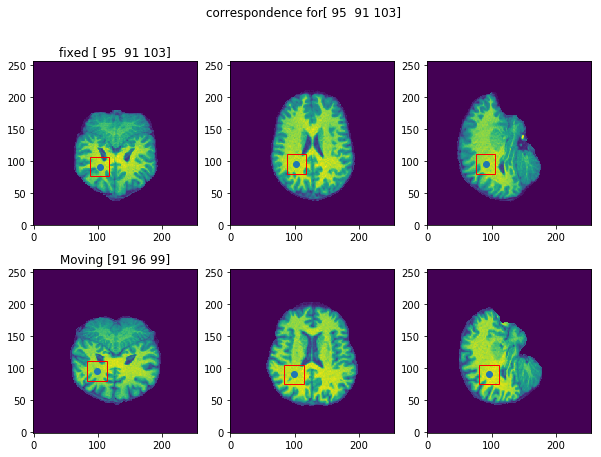

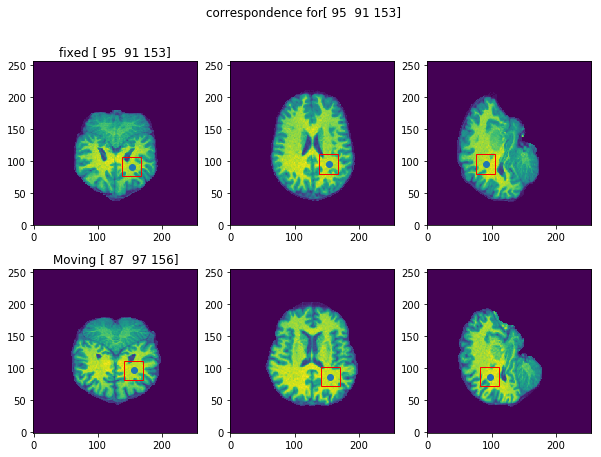

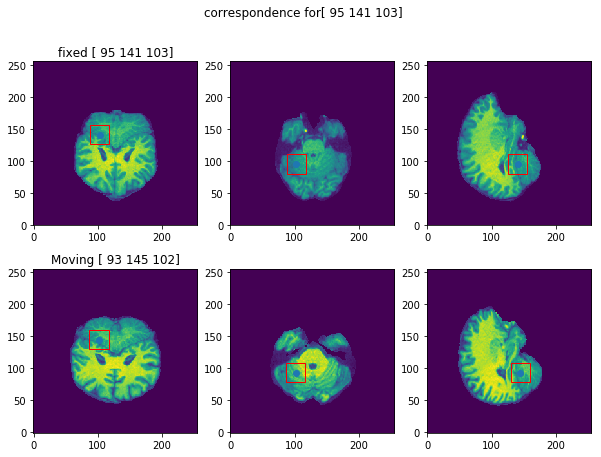

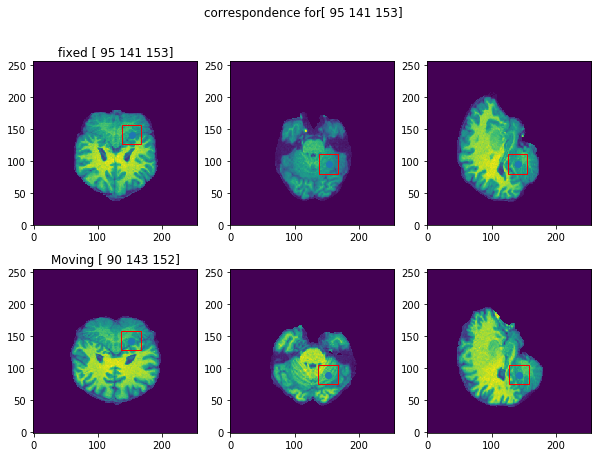

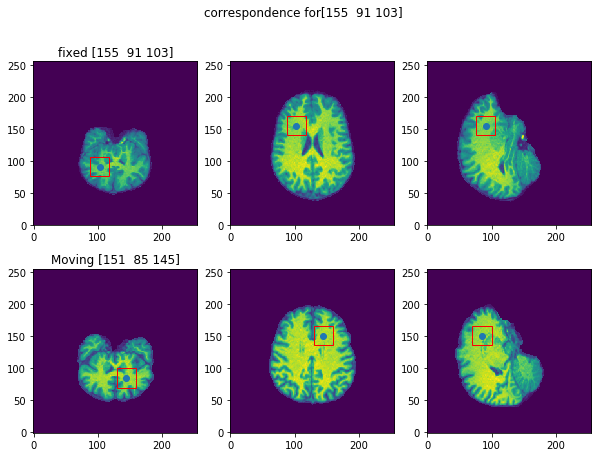

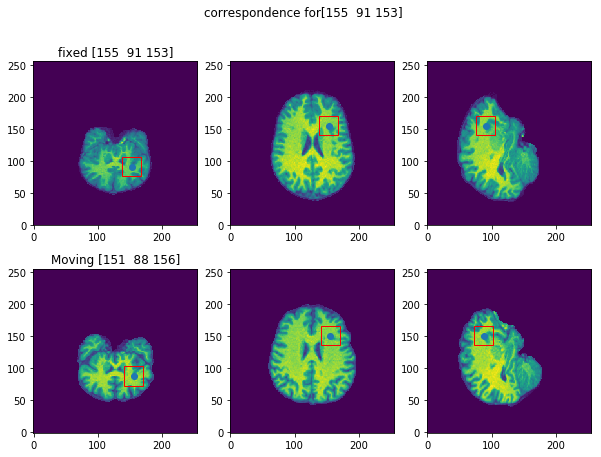

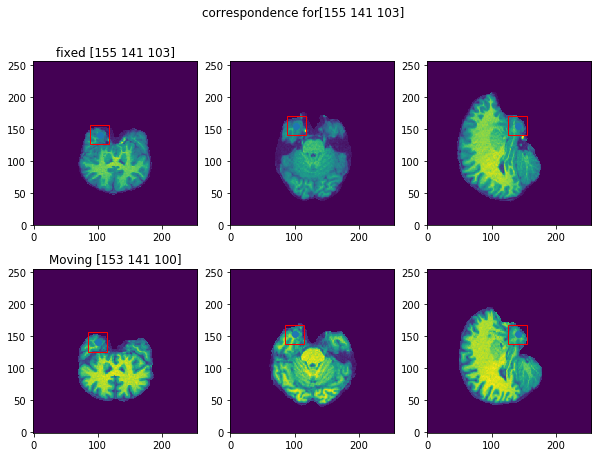

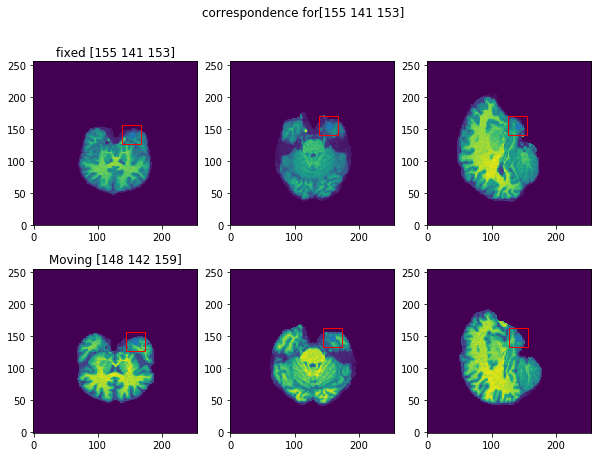

In [27]:
for i in range(len(pts)):
    #fixed_pixel=[127,127,127]
    #moving_pixel=[128,128,128]
    fixed_pixel=pts[i][0]
    moving_pixel=pts[i][-1]
    plot_one_pixel_on_all_moving_images(fixed_array,moving_array,fixed_pixel,moving_pixel)